# homework 1

#### question 1

$X_t = trand_t + seasonal_t + noise_t$  
$trand_t = 0.8t - 0.02t^2$  
$seasonal_t = 15sin(\cfrac{2\pi t}{12}) + 8cos(\cfrac{2\pi t}{6})$  
$noise_t$ ~ $N(0 , 5^2)$

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose  

np.random.seed(42)  
n = 120  # 10*12=120
t = np.arange(n)  

trend = 0.8 * t + 0.02 * t ** 2  
seasonal = 15 * np.sin(2 * np.pi * t / 12) + 8 * np.cos(2 * np.pi * t / 6) 
noise = np.random.normal(0, 5, n)  

time_series = trend + seasonal + noise
dates = pd.date_range(start="2014-01-01", periods=n, freq="ME")  
df = pd.DataFrame({"date": dates, "value": time_series})
df.set_index("date", inplace=True)  

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# decompose the time series
decomposition = seasonal_decompose(df["value"], model="additive", period=12)

# extract the components
decomposed_trend = decomposition.trend 
decomposed_seasonal = decomposition.seasonal
decomposed_resid = decomposition.resid  

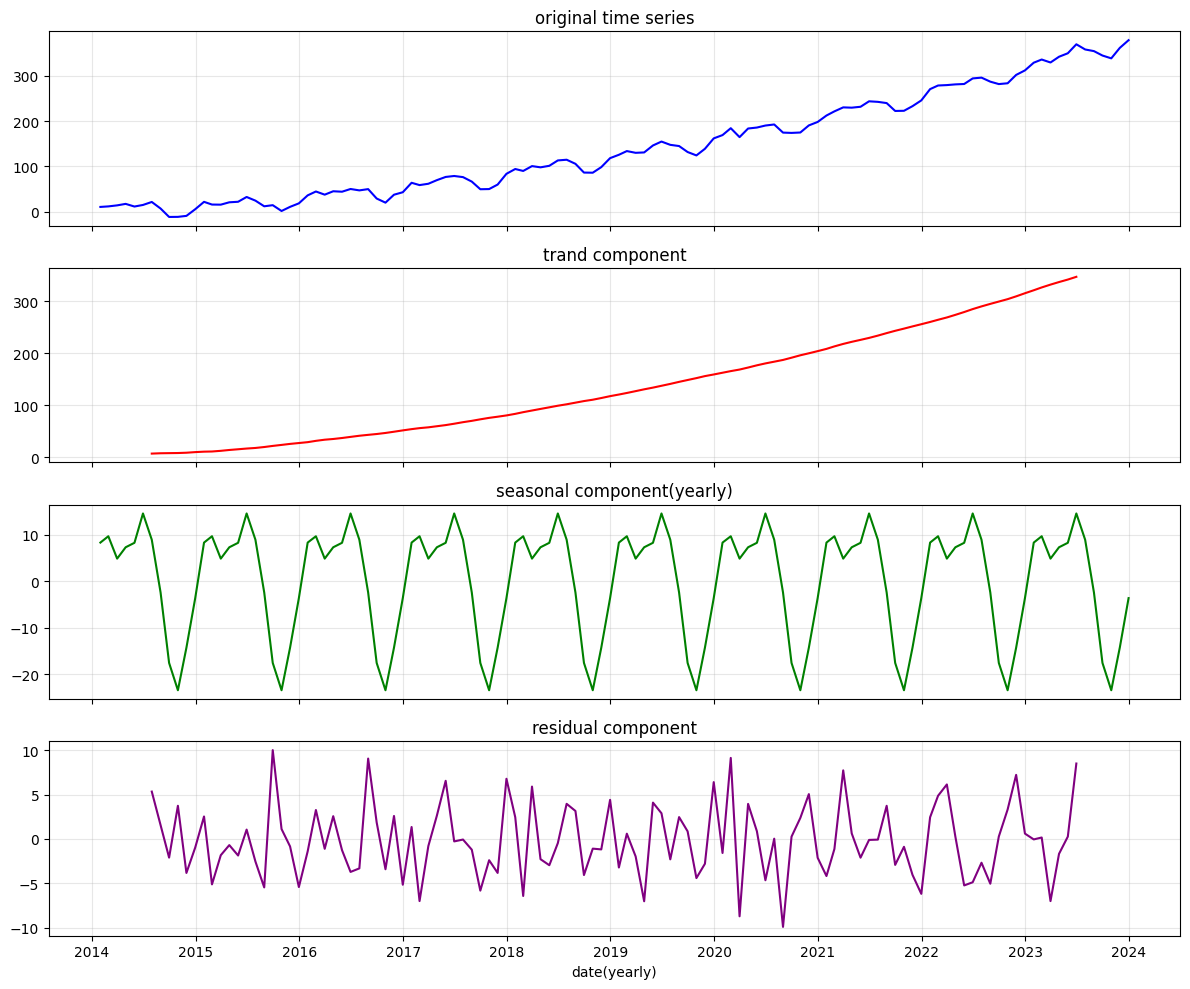

In [32]:
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# 1. original time series
axes[0].plot(df.index, df["value"], color="blue")
axes[0].set_title("original time series")
axes[0].grid(alpha=0.3)

# 2. trend component
axes[1].plot(decomposed_trend.index, decomposed_trend, color="red")
axes[1].set_title("trand component")
axes[1].grid(alpha=0.3)

# 3. seasonal component
axes[2].plot(decomposed_seasonal.index, decomposed_seasonal, color="green")
axes[2].set_title("seasonal component(yearly)")
axes[2].grid(alpha=0.3)

# 4. residual component
axes[3].plot(decomposed_resid.index, decomposed_resid, color="purple")
axes[3].set_title("residual component")
axes[3].set_xlabel("date(yearly)")
axes[3].grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### question 2
consider the time series  
$x_t = \beta_1 + \beta_2 t + \omega_t $     
$\beta_1$ and $\beta_2$ are known constants and $\omega_t$ is a white noise process with variance $\sigma_{\omega}^2$.  
(a)determine whether $x_t$ is stationary.  
(b)show that the first-order difference of $x_t$ ($y_t = x_t - x_{t-1}$) = is stationary.    
(c)show the moving average   
$v_t = \frac{1}{2q +1} \sum_{j=-q}^{q} x_{t-j}$ is $\beta_1 + \beta_2 t$ ，and give a simplified expression for the autocorrelation function.

(a) No, $x_t$ is nonstationary  
$ E[x_t] = E[\beta_1 + \beta_2 t + \omega_t] = E[\beta_1 + \beta_2 t] (because E[\omega_t] = 0)$ = $\beta_1 + \beta_2 t$  
which is time-dependent, so $x_t$ is nonstationary.

(b) $ y_t = x_t - x_{t-1} $ is stationary  
$ y_t = x_t - x_{t-1} = \beta_1 + \beta_2 t + \omega_t - \beta_1 - \beta_2 (t-1) - \omega_{t-1} = \beta_2 + \omega_t - \omega_{t-1} $  
$ E[y_t] = E[x_t - x_{t-1}] = E[\beta_1 + \beta_2 t + \omega_t - \beta_1 - \beta_2 (t-1) - \omega_{t-1}] = E[\beta_2 t + \omega_t - \beta_2 (t-1) - \omega_{t-1}] = E[\beta_2 + \omega_t -\omega_{t-1}] = \beta_2 = E[y_{t+h}] $  
$ Cov(y_t, y_{t+h}) = E[(y_{t}-E[y_t])(y_{t+h}-E[y_{t+h}])] = E[(\omega_t - \omega_{t-1})(\omega_{t+h} - \omega_{t+h-1})] $    
when h = 0 the $Cov(y_t, y_{t+h}) =E[\omega_t^2] + E[\omega_{t-1}^2] = 2\sigma_{\omega}^2$, which is constant, so $y_t$ is stationary.  
when $ h = \pm 1 , Cov(y_t, y_{t+h}) = - E[\omega_t^2] = -\sigma_{\omega}^2 $, which is also constant, so $y_t$ is stationary.  
when $ |h| > 1 , Cov(y_t, y_{t+h}) = 0 $, which means $y_t$ is independent of $y_{t+h}$, so $y_t$ is stationary.
so $y_t$ is stationary.  
(c) $v_t = \frac{1}{2q +1} \sum_{j=-q}^{q} x_{t-j}$   
$E[v_t] = E[\frac{1}{2q +1} \sum_{j=-q}^{q} x_{t-j}] = \frac{1}{2q +1} \sum_{j=-q}^{q} E[x_{t-j}] = \frac{1}{2q +1} \sum_{j=-q}^{q} (\beta_1 + \beta_2 (t-j)) = \frac{1}{2q +1} \sum_{j=-q}^{q} \beta_1 + \frac{1}{2q +1} \sum_{j=-q}^{q} \beta_2 (t-j) = \beta_1 + \beta_2 t + 0 = \beta_1 + \beta_2 t $  
$Cov(v_t, v_{t+h}) = E[(v_{t}-E[v_t])(v_{t+h}-E[v_{t+h}])] = E[\frac{1}{2q +1} \sum_{j=-q}^{q} (x_{t-j} - E[x_{t-j}])(\frac{1}{2q +1} \sum_{k=-q}^{q} x_{t+h-k} - E[\frac{1}{2q +1} \sum_{j=-q}^{q} x_{t+h-k}])]   $    
= $E[(\frac{1}{2q +1} \sum_{j=-q}^{q} \omega_{t-j})(\frac{1}{2q +1} \sum_{j=-q}^{q} \omega_{t+h-k})]   $
=$\frac{1}{(2q +1)^2} \sum_{j=-q}^{q} \sum_{k=-q}^{q} E[\omega_{t-j}\omega_{t+h-k}] $    
when  k = j + h , $Cov(v_t, v_{t+h}) = \frac{1}{(2q +1)^2} \sum_{j=-q}^{q} \sigma_{\omega}^2 = \frac{2q +1 - |h|}{(2q +1)^2} \sigma_{\omega}^2 $  
when  k $\ne$ j + h , $Cov(v_t, v_{t+h}) = 0 $  
consider that j and k $\in$ [-q,q]  
when |h| $\le$ q , $Cov(v_t, v_{t+h}) = \frac{2q +1}{(2q +1)^2} \sigma_{\omega}^2 $  
when |h| > q , $Cov(v_t, v_{t+h}) = 0 $  






#### question 3
let $\omega_t$ for t = 0 , $\pm 1$ ,$\pm 2$ ,$\pm 3$ ..... be a noise process, and consider the series  
$x_t = \omega_t  \omega_{t-1}$  
determine the mean and autocovariance function of $x_t$ for t = 0 , $\pm 1$ ,$\pm 2$ ,$\pm 3$ .....,   
and state whether it is stationary or not.

$ E[x_t] = E[\omega_t  \omega_{t-1}] = E[\omega_t]E[\omega_{t-1}] = 0   (t \ne t-1)$  
$ γ_x(h) = E[(x_t - E[x_t])(x_{t+h} - E[x_{t+h}])] = E[x_t x_{t+h}] $
$ =E[\omega_t  \omega_{t-1} \omega_{t+h}  \omega_{t+h-1}] $  
when h = 0 , $ γ_x(h) = E[\omega_t^2]E[\omega_{t-1}^2] = \sigma_{\omega}^4 $  
when h = $\pm 1$ , $ γ_x(h) = E[\omega_t  \omega_{t-1}^2  \omega_{t-2}] = E[\omega_t]E[\omega_{t-1}^2]E[\omega_{t-2}] = 0 $  
when |h| > 1 , $ γ_x(h) = E[\omega_t  \omega_{t-1} \omega_{t+h}  \omega_{t+h-1}] = E[\omega_t]E[\omega_{t-1}]E[\omega_{t+h}]E[\omega_{t+h-1}] = 0 $  

as E[x] is constant, $ γ_x(h) = \sigma_{\omega}^4 $ for h = 0 and h = $\pm 1$ and $ γ_x(h) = 0 $ for $|h| \geq 1$.
so $x_t$ is a stationary process.


#### question 3
for the AR(2) model given by:$ x_t = 0.9x_{t-2} + \omega_t $ ,
 find the roots of the autoregressive polynomial and sketch the ACF , and $\rho (h)$ for the AR(2) model.


$x_t = 0.9x_{t-2} + \omega_t $   
$ \Phi (z) = 1 - \phi_1 z - \phi_2 z^2 - \phi_3 z^3 -... - \phi_n z^n $  
$ \Phi (z) = 1 - 0z - 0.9 z^2 = 0 $  
$ Z^2 = - \cfrac{10}{9} $  
$ Z = \sqrt{- \cfrac{10}{9}} $  
$ Z = \cfrac{\sqrt{10}}{3} i $  
$ |z| \geq 1 $  so it is causal 



for ACF($\rho(h)$)
$ \rho(h) = \phi_1 \rho(h-1) + \phi_2 \rho(h-2)  (h \geq 1) $   
as $ \phi_1 = 0, \phi_2 = 0.9,  \rho(0) = 1  \rho(-h) = h  $
when h = 1 ,  $ \rho(1) = 0* \rho(0) + 0.9 * \rho(-1) = 0 $  
when h = 2 ,  $ \rho(2) = 0* \rho(1) + 0.9 * \rho(0) = -0.9 $  
when h = 3 ,  $ \rho(3) = 0* \rho(2) + 0.9 * \rho(1) = 0 $  
when h = 4 ,  $ \rho(4) = 0* \rho(3) + 0.9 * \rho(2) = 0.81 $  
when h = 5 ,  $ \rho(5) = 0* \rho(4) + 0.9 * \rho(3) = 0 $  
when h is odd ,  $ \rho(h) = 0 $  
when h is even ,  $ \rho(h) = (-0.9)^{h/2} $
so Even-only non-zero lag, alternating oscillation attenuation factor $\rho(h) = (-0.9)^{h/2}$






#### question 4
identify the following models as ARMA(p, q) models(watch out for parameter redundancy),  
and determine whether they are causal and/ or invertible.  
(a)$ x_t = 0.8x_{t-1} - 0.15x_{t-2} + \omega_t - 0.3\omega_{t-1}$  
(b)$ x_t = x_{t-1} - 0.5x_{t-2} + \omega_t - \omega_{t-1}$  

for(a)  
$x_t - 0.8x_{t-1} + 0.15x{t-2} = \omega_t - 0.3\omega_{t-1}$  
$\Phi(z) = 1 - 0.8z + 0.15z^2 = (1 - 0.3z)(1 - 0.5z)$  
$z = \cfrac{10}{3}$ or z = 2  
$\Theta(z) = 1 - 0.3z $   
$z = \cfrac{10}{3}$  
so it is ARMA(2, 1)    
norm length of z root for $\Phi(z) = 0$ is larger than 1 so it is causal  
norm length of z root for $\Theta(z) = 0$ is larger the 1 so it is vertible  

for(b)    
$ x_t - x_{t-1} + 0.5x_{t-1} = \omega_t - \omega_{t-1} $
$\Phi(z) = 1 - z + 0.15z^2 $  
z = 1 $\pm$ i  
$\Theta(z) = 1 - z $  
z = 1  
so it is ARMA(2, 1)  
norm length of z root for $\Phi(z) = 0$ is larger than 1 so it is causal    
norm length of z root for $\Theta(z) = 0$ is 1 so it is invertible  


